This is my first ever Data Analysis project. Suggestions are welcome. The dataset has been taken from www.kaggle.com .

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
from pylab import *
titanic_data=pd.read_csv('titanic_data.csv')
titanic_data.head()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great!,now let's start with checking if our data (raw data) is fit for analysis.


In [4]:
print 'Number of missing values in each column are: ',titanic_data.isnull().sum()

Number of missing values in each column are:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Now let's see if the missing values of embarked field and check if can predict missing values using other field.


In [13]:
print(titanic_data[titanic_data['Embarked'].isnull()==True])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


From above data we now know that above 2 person paid 80.0 fare and got into 1st class.


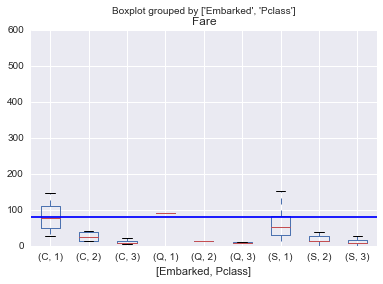

In [5]:
titanic_data_Embarked=titanic_data[['Embarked','Pclass','Fare']]
titanic_data_Embarked=titanic_data_Embarked.dropna()
titanic_data_Embarked.boxplot(by=['Embarked','Pclass'])
plt.axhline(y=80)
plt.show()

From the above plot we can see that y-intercept corresponding to 80.0 fare for missing embarked value coincides with meadian fare from station 'C' and for class 1, which is what we want. Setting missing embarked values to 'C'.

In [26]:
titanic_data['Embarked'].fillna('C');

Now we have filled the missing embarked value, going through the data we find that some of the fare value are zero, and to justify that there's no information given. So we replace those values with median of their class and 
station embarked from.


In [27]:
fares=titanic_data_Embarked.groupby(['Embarked','Pclass']).Fare.median()
print 'Median Fares',fares

Median Fares Embarked  Pclass
C         1         78.2667
          2         24.0000
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         13.5000
          3          8.0500
Name: Fare, dtype: float64


In [7]:
titanic_fare_0=titanic_data[['Embarked','Pclass','Fare']]

for index,aa in titanic_data[titanic_data['Fare']==0].iterrows():
   Embark=aa['Embarked']
   classP=aa['Pclass']

   if Embark=='S':
      if classP==3:
         aa['Fare']=14.64
      elif classP==2:
         aa['Fare']=20.32

      else:
         aa['Fare']=14.64

   elif Embark=='Q':
      if classP == 1:
         aa['Fare'] = 90.36
      elif classP == 2:
         aa['Fare'] = 12.32
      else:
         aa['Fare'] = 11.18

   else:
      if classP == 1:
         aa['Fare'] = 104.71
      elif classP == 2:
         aa['Fare'] = 25.35
      else:
         aa['Fare'] = 11.21

titanic_data[titanic_data['Fare'] == 0].ix[index,'Fare']=aa['Fare']

For 'Sex' column mapping 'male'=1 and 'female'=0, for the sake of convinience

Now replace the values of 'Sex' column by mapping 'male'=1 and 'female='0' for convinience.

In [8]:
mapping={'male':1,'female':0}
titanic_data['Sex'].replace(mapping,inplace='True')

In [9]:
survived=titanic_data['Survived']
total_passenger_survived=survived.sum()
print 'Total number of passenger survived in the accident',survived.sum()

Total number of passenger survived in the accident 342


Dividing the passenger in groups of childrens and adult and comparing thier surviability.Now dividing the passengers in group of children and adulat and comparing thier survivability.Let's now divide the passnger in groups of childre and adults and compare their surviability.Let's now divide the passnger in groups of childre and adults and compare their surviability.

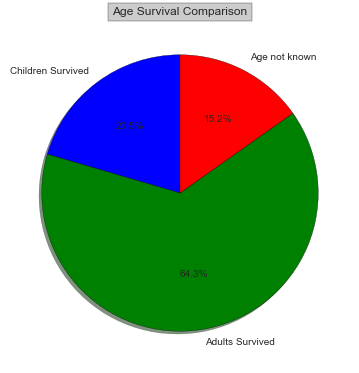

In [10]:
adult_passenger=titanic_data[titanic_data['Age']>18.0]
children_passenger=titanic_data[titanic_data['Age']<=18]
total_children_passnger=len(children_passenger)
total_adult_passenger=len(adult_passenger)
total_children_survived=len(children_passenger[children_passenger['Survived']==1])
total_adult_survived=len(adult_passenger[adult_passenger['Survived']==1])
percent_of_children_out_of_survived=(total_children_survived/float(total_passenger_survived))*100
percent_of_adult_out_of_survived=(total_adult_survived/float(total_passenger_survived))*100
unknown=abs(100.0-(percent_of_adult_out_of_survived+percent_of_children_out_of_survived))


#################################PIE CHART################################################
figure(1,figsize=(6,6))
ax=axes([0.1,0.1,0.8,0.8])
fraction=[percent_of_children_out_of_survived,percent_of_adult_out_of_survived,unknown]
labels=['Children Survived','Adults Survived','Age not known']

pie(fraction,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
title('Age Survival Comparison',bbox={'facecolor':'0.8','pad':4})
show()

From the above piechart we can see that percentage of adults survived is more than percentage of children who survived the accident. The above data is not very accurate due to the significant presence of unknow age group. One way to make it more accurate is to identify the children and adults from their name. For eg. the passenger with title 'Master' will be treated as young children.One ambiguous title here is 'Mrs.', someone with this title can be a child or an unmarried adult. We will treat everyone with this title as 'unknown age group' 





total missing age passenger who survived 52
Left out children 2
left out adult 28
unknown 15.2046783626


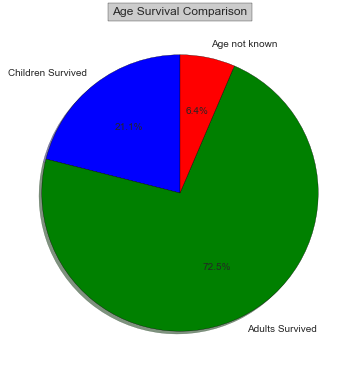

In [11]:
titanic_data['Age'].fillna(0.0,inplace=True)
passenger_name=titanic_data[['Name','Age','Survived']]
passenger_zero_age=passenger_name[passenger_name['Age']==0.0]
passenger_name_zero_age_survived=passenger_zero_age[passenger_zero_age['Survived']==1]['Name']
def findinf_keyword_childer(name):
   name = name.lower()

   if (name.find(', master')>=0):
      return 1
   else :
      return 0


def findinf_keyword_adult(name):
   name = name.lower()

   if (name.find(', mr.') >= 0):
      return 1
   elif (name.find(', mrs.')>=0):
      return 1
   else:
      return 0


print 'total missing age passenger who survived',len(passenger_name_zero_age_survived)

passenger_unknown_children=passenger_name_zero_age_survived.apply(findinf_keyword_childer)
left_out_children=passenger_unknown_children.sum()

print 'Left out children',left_out_children
passenger_unknown_adult=passenger_name_zero_age_survived.apply(findinf_keyword_adult)
left_out_adult=passenger_unknown_adult.sum()

print 'left out adult',left_out_adult
print 'unknown',unknown
# Update pie chart
percent_of_children_out_of_survived=((total_children_survived+left_out_children)/float(total_passenger_survived))*100
percent_of_adult_out_of_survived=((total_adult_survived+left_out_adult)/float(total_passenger_survived))*100
unknown=abs(100.0-(percent_of_adult_out_of_survived+percent_of_children_out_of_survived))

figure(1,figsize=(6,6))
ax=axes([0.1,0.1,0.8,0.8])
fraction=[percent_of_children_out_of_survived,percent_of_adult_out_of_survived,unknown]
labels=['Children Survived','Adults Survived','Age not known']

pie(fraction,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
title('Age Survival Comparison',bbox={'facecolor':'0.8','pad':4})
show()

Ahh! Now the data looks more accurate with decrease in percentage of "Age not know" group.


Let's now see what else can we find out from the data. One thing that comes to mind is
how does survivability varies for females and males in different class i.e. we want to find out whether paying more (corresponding to different class) made you likely to survive more. 

In [18]:
survived_Sex_pclass=titanic_data[['Survived','Sex','Pclass']]
passenger_Sex_survived=titanic_data[titanic_data['Survived']==1]
male_passenger_survived=(survived_Sex_pclass[survived_Sex_pclass['Sex']==1])
female_passenger_survived=(survived_Sex_pclass[survived_Sex_pclass['Sex']==0])


class_wise_male_survived=male_passenger_survived.groupby(['Survived','Pclass']).Sex.count()
class_wise_female_survived=female_passenger_survived.groupby(['Survived','Pclass']).Sex.count()

print 'Class wise male survival :'
print class_wise_male_survived
print 'Class wise female survival :'
print class_wise_female_survived

Class wise male survival :
Survived  Pclass
0         1          77
          2          91
          3         300
1         1          45
          2          17
          3          47
Name: Sex, dtype: int64
Class wise female survival :
Survived  Pclass
0         1          3
          2          6
          3         72
1         1         91
          2         70
          3         72
Name: Sex, dtype: int64


Now let's plot this data.

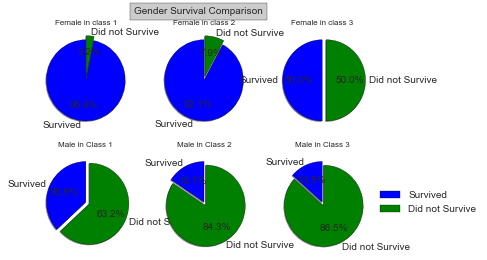

In [22]:
frac_male_1=36.8
frac_male_2=15.7
frac_male_3=13.5
frac_female_1=96.8
frac_femlae_2=92.1
frac_female_3=50
frac=np.array([frac_female_1,frac_femlae_2,frac_female_3,frac_male_1,frac_male_2,frac_male_3])
for i in range(6):
   plt.subplot(2,3,i+1)
   explode=(0.0,0.1)
   fraction=[frac[i],(100-frac[i])]
   if i<=2:
      title('Female in class '+str(i+1),size=8)
   else:
      title('Male in Class '+str(i-2),size=8)
   labels=['Survived','Did not Survive']

   pie(fraction,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90,explode=explode)
plt.suptitle('Gender Survival Comparison',bbox={'facecolor':'0.8','pad':4},size=10)
plt.legend(labels, loc='center left', shadow=True, bbox_to_anchor=(1, 0.5))
show()

Yes, the answer is yes from the pie charts we can infer two things,
1) The percentage of people who paid more were more likely to survive in the accident.
2) We can easily infer that female passenger were rescued first then male passenger.

Now, with the given list of passenger, group them into families with information of thier surname and Parch and SibSp. And check if the family size had something to do with surviability.

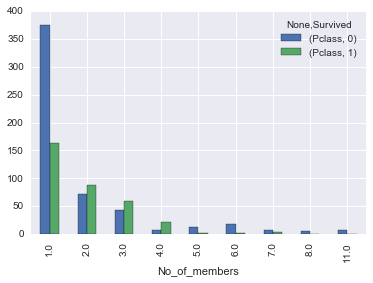

In [25]:
family_class_survived=pd.DataFrame()
for index,b in titanic_data.iterrows():
   b['Name']=b['Name'].lower()
   [surname,name]=b['Name'].split(',')
   Sibsp=b['SibSp']
   Parch=b['Parch']
   family_members=Sibsp+Parch+1
   titanic_data.ix[index,'Family']=surname
   titanic_data.ix[index,'No_of_members']=family_members

titanic_data1=titanic_data[['Pclass','Survived','No_of_members']]
family_size_name_survived=titanic_data1.groupby(['No_of_members','Survived']).count()
family_size_name_survived.unstack().plot.bar()
plt.show()

We can see that most of the singles died in the accident. The maximum chances of surviving was more if the passenger were in a group of 2,3 or 4. Above that the chances were almost negligible.

The above analysis shows that adult passengers were more likely to survive then children. May be becuase of children's debility to save themselves.While, majority of the womens survived the accident. For that one of the reason may be concept of "women's first". Ofcourse other reasons are possible but to me this seems the most palusible reason. Also, those who paid more for the ticket (for different classes) survived more,so paying more was after all worth it. This can be due the fact that higher class passenger were rescued first then lower class. Finally, smaller family sizes had somewhat better chancesof surviving then bigger family sizes. Furthermore, family size of 2,3 and 4 had the maximum chances of survival.